#  Scraping the 10-Day Forecast from Weather.com

This notebook takes the New York City 10 day forecast page (https://weather.com/weather/tenday/l/USNY0996:1:US) and spits out a pandas dataframe containing high and low temperature, chance of precipitation, and wind velocity for each day. The code should work for any region's 10 day forecast.

(For some reason, there are more than 10 days listed on the 10 day forecast page)

In [1]:
import pandas as pd
from bs4 import BeautifulSoup
import requests

In [148]:
page = requests.get("https://weather.com/weather/tenday/l/USNY0996:1:US")
page #response value starting with a 2 means success

<Response [200]>

['doctype html',
 '\n',
 <html data-connection-speed="4g" data-device-class="desktop" dir="ltr" itemscope="" itemtype="http://schema.org/Organization" lang="en-US" prefix="fb: http://ogp.me/ns/fb# og: http://ogp.me/ns# article: http://ogp.me/ns/article# book: http://ogp.me/ns/book# profile: http://ogp.me/ns/profile# video: http://ogp.me/ns/video# product: http://ogp.me/ns/product#"><head itemscope="" itemtype="http://schema.org/WebSite"><meta charset="utf-8"/><meta content="width=device-width, initial-scale=1, maximum-scale=1, user-scalable=0, viewport-fit=cover" name="viewport"/><script charset="UTF-8">window.loadNewRelic=false;(function(){var rNumber=Math.random();if(rNumber>=0.75){window.loadNewRelic=true;}if(window.loadNewRelic){window.NREUM||(NREUM={}),__nr_require=function(t,e,n){function r(n){if(!e[n]){var o=e[n]={exports:{}};t[n][0].call(o.exports,function(e){var o=t[n][1][e];return r(o||e)},o,o.exports)}return e[n].exports}if("function"==typeof __nr_require)return __nr_require
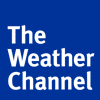
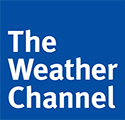

In [113]:
soup = BeautifulSoup(page.content, 'html.parser')
list(soup.children)

In [149]:
time_period = daily_forecast.select(".date-time")
time_period
periods = [day.get_text() for day in period_tags]

periods

['Tonight',
 'Fri',
 'Sat',
 'Sun',
 'Mon',
 'Tue',
 'Wed',
 'Thu',
 'Fri',
 'Sat',
 'Sun',
 'Mon',
 'Tue',
 'Wed',
 'Thu']

In [147]:
daily_forecast = soup.find(id="main-DailyForecast-1bbda948-59cc-4040-9a36-d9c1ed37a806")
temps = soup.find_all(class_ ="temp")
highs = [t.get_text()[0:2] for t in temps][1:]
lows = [t.get_text()[3:-1] for t in temps][1:]

#If the first period is 'tonight', then there won't be a high temperature listed so the indexing changes slightly
if periods[0] == 'Tonight':
    lows[0] = temps[1].get_text()[2:-1] 
highs, lows

(['--',
  '84',
  '81',
  '84',
  '91',
  '94',
  '93',
  '87',
  '80',
  '81',
  '83',
  '83',
  '82',
  '81',
  '81'],
 ['65',
  '67',
  '68',
  '73',
  '77',
  '78',
  '76',
  '72',
  '70',
  '70',
  '70',
  '70',
  '69',
  '68',
  '68'])

In [142]:
precip = soup.find_all(class_ ="precip")
p_chance = [p.get_text() for p in precip][1:]
p_chance

['0%',
 '0%',
 '0%',
 '0%',
 '10%',
 '10%',
 '10%',
 '20%',
 '50%',
 '50%',
 '50%',
 '40%',
 '30%',
 '20%',
 '30%']

In [144]:
wind = soup.find_all(class_ ="wind")
w_velocity = [w.get_text() for w in wind][1:]
w_velocity

['NW 4 mph ',
 'SW 7 mph ',
 'SSW 8 mph ',
 'SSW 10 mph ',
 'WSW 7 mph ',
 'WSW 9 mph ',
 'WSW 10 mph ',
 'WNW 6 mph ',
 'ENE 8 mph ',
 'E 9 mph ',
 'SSE 8 mph ',
 'WSW 9 mph ',
 'NE 7 mph ',
 'ENE 6 mph ',
 'ESE 7 mph ']

In [146]:
weather = pd.DataFrame({"Day":periods, "High_Temp":highs, "Low_Temp":lows, "Precipitation": p_chance, "Wind": w_velocity})
weather

,Day,High_Temp,Low_Temp,Precipitation,Wind
0,Tonight,--,65,0%,NW 4 mph
1,Fri,84,67,0%,SW 7 mph
2,Sat,81,68,0%,SSW 8 mph
3,Sun,84,73,0%,SSW 10 mph
4,Mon,91,77,10%,WSW 7 mph
5,Tue,94,78,10%,WSW 9 mph
6,Wed,93,76,10%,WSW 10 mph
7,Thu,87,72,20%,WNW 6 mph
8,Fri,80,70,50%,ENE 8 mph
9,Sat,81,70,50%,E 9 mph
